# Iris dataset.
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.


attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [1]:
pwd

In [2]:
import numpy as np
import pandas as pd

from copy import deepcopy

import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Sanity Check

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

# EDA

In [6]:
#Checking for null values in sepal_length
data['sepal_length'].isnull().any()

False

In [7]:
#Checking for null values in sepal_width
data['sepal_width'].isnull().any()

False

In [8]:
#Checking for null values in petal_length
data['petal_length'].isnull().any()

False

In [9]:
#Checking for null values in petal_width
data['petal_width'].isnull().any()

False

In [10]:
data[data.species =='setosa']
data_ver = data[(data.species =='versicolor') & (data.sepal_length>6)]
len(data_ver.index) # To find the length of the data frame


20

# Visualization


<AxesSubplot:xlabel='sepal_length', ylabel='species'>

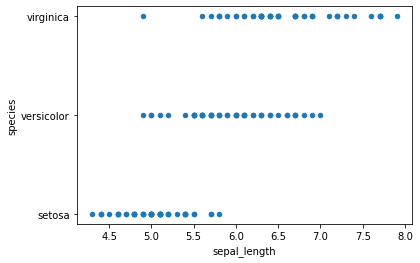

In [11]:
#Plotting sepal_length Vs species
data.plot.scatter(x='sepal_length', y = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

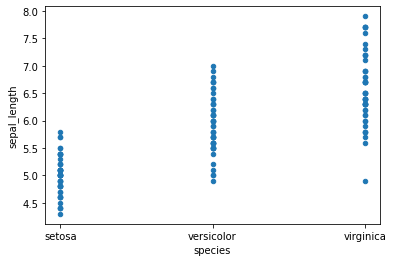

In [12]:
#Plotting sepal_length Vs species
data.plot.scatter(y='sepal_length', x = 'species')

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

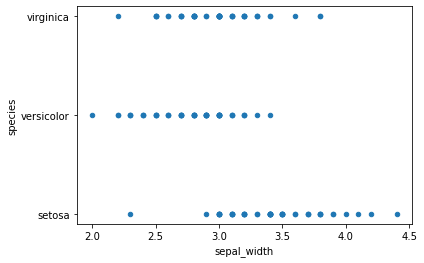

In [13]:
#Plotting sepal_width Vs species
data.plot.scatter(x='sepal_width', y = 'species')

<AxesSubplot:xlabel='petal_length', ylabel='species'>

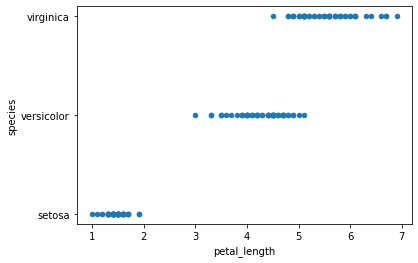

In [14]:
#Plotting petal_length Vs species
data.plot.scatter(x='petal_length', y = 'species')

<AxesSubplot:xlabel='petal_width', ylabel='species'>

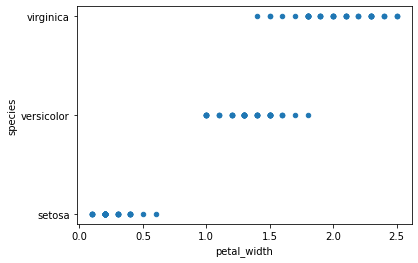

In [15]:
#Plotting petal_width Vs species
data.plot.scatter(x='petal_width', y = 'species')

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

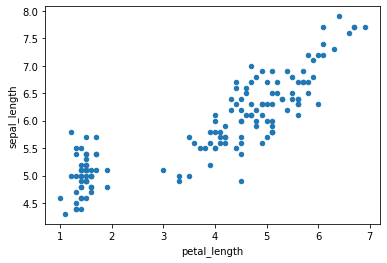

In [16]:
#plotting petal_length vs sepal_length
data.plot.scatter(x='petal_length', y ='sepal_length')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

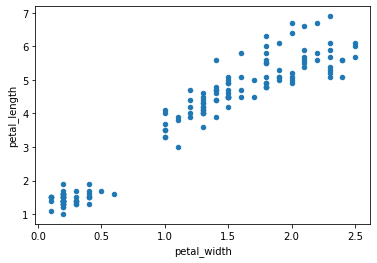

In [17]:
#plotting petal_width vs petal_length
data.plot.scatter(x='petal_width', y ='petal_length')

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

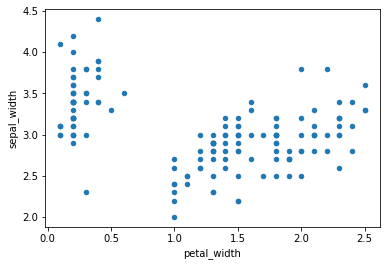

In [18]:
#plotting petal_width vs sepal_width
data.plot.scatter(x="petal_width",y='sepal_width')

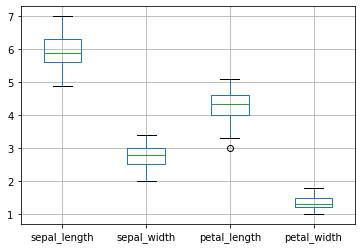

In [19]:
#checking for outliers in Versicolor features
data_ver=data[(data.species =='versicolor')]
boxplot= data_ver.boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'])


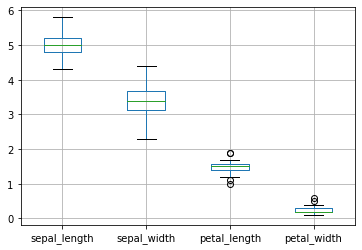

In [20]:
#checking for outliers in setosa features
data_setosa=data[(data.species =='setosa')]
boxplot= data_setosa.boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'])

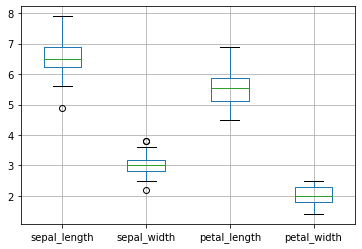

In [21]:
#checking for outliers in viginica features
data_virginica=data[(data.species =='virginica')]
boxplot= data_virginica.boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'])

In [22]:
#label encoding target variables
data.species.replace(('setosa', 'virginica', 'versicolor'), (0, 1, 2), inplace = True)
data['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

In [23]:
#defining data & target

#X = data.drop('species', axis=1)
#y = data['species']

#print(X)
#print(y)

In [24]:
# Change categorical data to number 0-2
data['species'] = pd.Categorical(data['species'])
data['species'] = data['species'].cat.codes


# Change dataframe to numpy matrix
datatrain = data.values[:, 0:4]
category = data.values[:, 4]

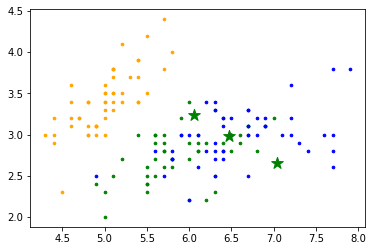

In [25]:
# Number of clusters
k = 3
# Number of training data
n = datatrain.shape[0]
# Number of features in the data
c = datatrain.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(datatrain, axis = 0)
std = np.std(datatrain, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(datatrain[i, 0], datatrain[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [26]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

datatrain.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(datatrain - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(datatrain[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[5.01818182, 3.32181818, 1.63272727, 0.31454545],
       [6.06041667, 2.79375   , 4.40208333, 1.39791667],
       [6.58723404, 3.00638298, 5.5893617 , 2.02978723]])

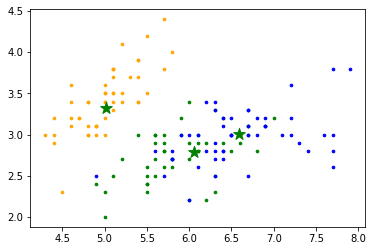

In [27]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(datatrain[i, 0], datatrain[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)